In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
import numpy as np   # Import the NumPy library, which provides support for arrays, matrices, and mathematical functions in Python.
import pandas as pd  # Import the Pandas library, which provides support for data manipulation and analysis in Python.
import scipy         # Import the SciPy library, which provides support for scientific and technical computing in Python.
import warnings      # Import the warnings library, which allows you to filter out warnings that may be displayed during the execution of your code
LABELS = ["Ataque", "Normal"]        # Define the labels for the two classes.
np.random.seed(7)                   # Set random seed for reproducibility
from collections import Counter
from sklearn import metrics
from sklearn import utils
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize
import shap
shap.initjs()

warnings.filterwarnings('ignore')   # Ignore any warnings that may be display

2023-05-23 20:46:36.465181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 20:46:36.508743: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 20:46:36.509701: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 20:46:37.257123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import metricas
from sklearn import metrics
import psutil
#import GPUtil
import time

start_time = time.time()
psutil.cpu_times()
psutil.virtual_memory()
psutil.disk_partitions()

t_cpu = psutil.cpu_times()
cpu_usage = psutil.cpu_percent(1)
mem_usage = psutil.virtual_memory().percent
disco2 = psutil.disk_usage('/')

In [3]:
import joblib
import os

def pickle_model(pkl_filename, operation, model):
    if operation == 'wb':
        with open(pkl_filename, operation) as file:
            joblib.dump(model, file)
        print('Modelo', pkl_filename, 'guardado.')
            
    elif operation == 'rb':
        with open(pkl_filename, operation) as file:
            joblib_model =joblib.load(file)
        print('Lectura de', pkl_filename, '.')
        return joblib_model

In [4]:
dfs = []
for i in range(2):
    path = 'Ids_IoT_{}.csv'  # There are 4 input csv files
    #dfs.append(pd.read_csv(path.format(i), usecols=features_to_keep, sep='\t',decimal='.',low_memory=False))
    dfs.append(pd.read_csv(path.format(i), sep=';',decimal='.',low_memory=False))
df = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df
df =utils.shuffle(df, random_state=64)
df

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
1835,166.0,41,42,38,0.622951,0.950820,0.904657,0.998884,0.815994,2432,0.605276,0.923843,0,38,0,76,1
481,134.0,13,0,124,0.712644,0.712644,0.850905,0.850905,0.565002,13027,0.774173,0.774173,0,0,0,658,0
1087,289.0,33,22,24,0.157895,0.157895,0.169652,0.169652,0.084991,1824,0.135091,0.135091,0,0,24,0,0
1820,161.0,37,32,6,1.000000,1.000000,1.000000,1.000000,0.002991,612,1.000000,1.000000,6,0,0,0,1
426,122.0,32,37,21,0.077491,0.077491,0.115724,0.115724,0.106003,1596,0.063308,0.063308,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,267.0,36,27,35,0.152174,0.152174,0.275807,0.275807,0.162994,2660,0.139245,0.139245,0,0,35,0,0
54,68.0,40,28,37,0.107872,0.107872,0.010357,0.010357,0.009995,2812,0.107872,0.107872,0,0,37,0,0
2167,342.0,26,24,6,0.092308,0.092308,0.409719,0.409719,0.388000,456,0.092308,0.092308,0,0,6,0,1
998,263.0,27,42,29,0.138095,0.138095,0.130571,0.130571,0.106934,2813,0.130382,0.130382,29,0,0,0,0


In [ ]:
#df = df.drop('Unnamed: 0', axis=1)

In [ ]:
#df.isnull().sum(axis = 0)

In [ ]:
df.info()

In [5]:
df = df.drop(['second', 'src', 'dst'], axis=1)
df

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
1835,38,0.622951,0.950820,0.904657,0.998884,0.815994,2432,0.605276,0.923843,0,38,0,76,1
481,124,0.712644,0.712644,0.850905,0.850905,0.565002,13027,0.774173,0.774173,0,0,0,658,0
1087,24,0.157895,0.157895,0.169652,0.169652,0.084991,1824,0.135091,0.135091,0,0,24,0,0
1820,6,1.000000,1.000000,1.000000,1.000000,0.002991,612,1.000000,1.000000,6,0,0,0,1
426,21,0.077491,0.077491,0.115724,0.115724,0.106003,1596,0.063308,0.063308,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,35,0.152174,0.152174,0.275807,0.275807,0.162994,2660,0.139245,0.139245,0,0,35,0,0
54,37,0.107872,0.107872,0.010357,0.010357,0.009995,2812,0.107872,0.107872,0,0,37,0,0
2167,6,0.092308,0.092308,0.409719,0.409719,0.388000,456,0.092308,0.092308,0,0,6,0,1
998,29,0.138095,0.138095,0.130571,0.130571,0.106934,2813,0.130382,0.130382,29,0,0,0,0


In [ ]:
# normalización opc.1
#scaler = StandardScaler()
#df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [6]:
# normalización con Max_Scaler opc.2
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [7]:
#Se hace para ver el limite de decision con dos atributos
#Dbscan es de clustering y solo trabajara con X sin la etiqueta y
X = df[['packetcount', 'src_ratio', 'dst_ratio', 'src_duration_ratio',
       'dst_duration_ratio', 'TotalPacketDuration', 'TotalPacketLenght',
       'src_packet_ratio', 'dst_packet_ratio', 'DioCount', 'DisCount',
       'DaoCount', 'OtherMsg']].copy()
y = df["label"].copy()

In [ ]:
X

In [ ]:
# selección de características
#selector = SelectKBest(mutual_info_classif, k=10)
#X = selector.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])

In [8]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [9]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [10]:
# Reducimos el conjunto de datos a las 7 características más importantes
X_reduced = X[list(feature_importances_sorted.head(9).index)].copy()
X_reduced

,TotalPacketDuration,TotalPacketLenght,packetcount,src_packet_ratio,src_ratio,dst_packet_ratio,src_duration_ratio,dst_ratio,dst_duration_ratio
1835,0.016936,0.106203,0.177033,0.604387,0.622018,0.923671,0.904657,0.950698,0.998884
481,0.011727,0.583799,0.588517,0.773664,0.711932,0.773664,0.850905,0.711932,0.850905
1087,0.001764,0.078796,0.110048,0.133143,0.155810,0.133143,0.169652,0.155810,0.169652
1820,0.000062,0.024162,0.023923,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
426,0.002200,0.068518,0.095694,0.061198,0.075207,0.061198,0.115724,0.075207,0.115724
...,...,...,...,...,...,...,...,...,...
1009,0.003383,0.116480,0.162679,0.137306,0.150075,0.137306,0.275807,0.150075,0.275807
54,0.000207,0.123332,0.172249,0.105862,0.105663,0.105862,0.010357,0.105663,0.010357
2167,0.008053,0.017129,0.023923,0.090263,0.090061,0.090263,0.409719,0.090061,0.409719
998,0.002219,0.123377,0.133971,0.128424,0.135962,0.128424,0.130571,0.135962,0.130571


In [11]:
X_reduced.columns

Index(['TotalPacketDuration', 'TotalPacketLenght', 'packetcount',
       'src_packet_ratio', 'src_ratio', 'dst_packet_ratio',
       'src_duration_ratio', 'dst_ratio', 'dst_duration_ratio'],
      dtype='object')

In [ ]:
# homogeneización de variables
#X = PCA(n_components=2).fit_transform(X)

In [ ]:
# balanceo del dataset
adasyn = ADASYN()
X, y = adasyn.fit_resample(X, df.iloc[:, -1])

In [ ]:
y.value_counts()

In [ ]:
X

In [ ]:
#Reducción de dimensionalidad mediante t-SNE:
#tsne = TSNE(n_components=2, perplexity=30)
#X_tsne = tsne.fit_transform(X)

In [ ]:
#X_tsne

In [ ]:
#Reducción de dimensionalidad mediante PCA:
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X)

In [12]:
#División del conjunto de datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [1]:
#Etrenamiento y prueba de los algoritmos de detección de intrusiones:# Isolation Forest

# ***********k-means*************
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
print('****KMeans****')
print(confusion_matrix(y_test, y_pred_kmeans))
print(classification_report(y_test, y_pred_kmeans))

#*********** IsolationForest************
iforest = IsolationForest(n_estimators=300, max_samples=len(X_train),contamination=0.05,random_state=42, verbose=0)
iforest.fit(X_train)
y_pred_iforest = iforest.predict(X_test)
print('****IsolationForest****')
print(confusion_matrix(y_test, y_pred_iforest))
print(classification_report(y_test, y_pred_iforest))

# ***********LOF***********
lof = LocalOutlierFactor(n_neighbors=20, metric='minkowski', contamination=0.05)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = np.array([1 if x == -1 else 0 for x in y_pred_lof])
print('****LOF****')
print(confusion_matrix(y_test, y_pred_lof))
print(classification_report(y_test,y_pred_lof))

# ***********LOFV***********
lofv = LocalOutlierFactor(n_neighbors=20, metric='minkowski', contamination=0.05)
y_pred_lofv = lofv.fit_predict(X_test)
y_pred_lofv = np.array([1 if x == -1 else 0 for x in y_pred_lofv])
print('****LOF****')
print(confusion_matrix(y_test, y_pred_lofv))
print(classification_report(y_test,y_pred_lofv))


# ***********OneClassSVM***********
svm = OneClassSVM(kernel='rbf', nu=0.05)
svm.fit(X_train)
y_pred_svm = svm.predict(X_test)
print('*****OneClass SVM*****')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

NameError: name 'KMeans' is not defined

In [ ]:
# DBSCAN
#dbscan = DBSCAN(eps=0.90, min_samples=6)
#dbscan.fit(X_train)
#y_pred_dbscan = dbscan.fit_predict(X_test)
#Obtenemos los clusters del objeto dbscan
#clusters = dbscan.labels_
#print('****DBSCAN****')
#print(confusion_matrix(y_test, y_pred_dbscan))
#print(classification_report(y_test, y_pred_dbscan))

In [14]:
#Entrenamiento y prueba del autoencoder:Copy code
# Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
decoder = Dense(input_dim, activation="relu")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

y_pred_ae = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred_ae, 2), axis=1)
threshold = np.percentile(mse, 95)
y_pred_ae = [1 if e > threshold else 0 for e in mse]

print('*****Autoencoder*****')
print(confusion_matrix(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))

Epoch 1/100
64/64 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.0772
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0390
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0184
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0130
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0064
Epoch 8/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 9/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 11/

In [ ]:
# Visualizar los resultados
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar los resultados de Isolation Forest
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(X_test[y_pred_iforest == -1, 0], X_test[y_pred_iforest == -1, 1], c='r')
plt.title('Isolation Forest')
plt.show()

# Visualizar los resultados de DBSCAN
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_resampled)
#plt.scatter(X_test[y_pred_dbscan == -1, 0], X_test[y_pred_dbscan == -1, 1], c='r')
#plt.title('DBSCAN')
#plt.show()

# Visualizar los resultados de k-means
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(X_test[y_pred_kmeans == 0, 0], X_test[y_pred_kmeans == 0, 1], c='r')
plt.title('KMeans')
plt.show()

# Visualizar los resultados de LOF
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(X_test[y_pred_lof == -1, 0], X_test[y_pred_lof == -1, 1], c='r')
plt.title('LOF')
plt.show()

# Visualizar los resultados de OneClass SVM
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(X_test[y_pred_svm == -1, 0], X_test[y_pred_svm == -1, 1], c='r')
plt.title('OneClass SVM')
plt.show()

# Visualizar los resultados del autoencoder
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(X_test[y_pred_ae == -1, 0], X_test[y_pred_ae == -1
, 1], c='r')
plt.title('Autoencoder')
plt.show()

In [ ]:
# Calcular las métricas de validación externas
'''en un problema de clasificación multiclase con la estrategia 
de reducción de clases a binario y utilizando el promedio macro:
'''
print('Métricas de validación externas')
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Índice Jaccard
print('**Índice Jaccard')
print("iforest: ", jaccard_score(y_test, y_pred_iforest, average='macro'))
print("kmeans: ", jaccard_score(y_test, y_pred_kmeans, average='macro'))
print("LOF: ", jaccard_score(y_test, y_pred_lof, average='macro'))
print("OCSVM: ", jaccard_score(y_test, y_pred_svm, average='macro'))
print("AE: ", jaccard_score(y_test, y_pred_ae, average='macro'))

# F1 score
print('**F1 score')
print("iforest: ", f1_score(y_test, y_pred_iforest,average='macro'))
print("kmeans: ", f1_score(y_test, y_pred_kmeans, average='macro'))
print("LOF: ", f1_score(y_test, y_pred_lof, average='macro'))
print("OCSVM: ",f1_score(y_test, y_pred_svm, average='macro'))
print("AE: ",f1_score(y_test, y_pred_ae, average='macro'))

# Precisión
print('*** Precisión')
print("iforest: ", precision_score(y_test, y_pred_iforest,average='macro'))
print("kmeans: ", precision_score(y_test, y_pred_kmeans,average='macro'))
print("LOF: ", precision_score(y_test, y_pred_lof,average='macro'))
print("OCSVM: ", precision_score(y_test, y_pred_svm,average='macro'))
print("AE: ", precision_score(y_test, y_pred_ae,average='macro'))

# Sensibilidad
print('Sensibilidad')
print("iforest: ", recall_score(y_test, y_pred_iforest,average='macro'))
print("kmeans: ", recall_score(y_test, y_pred_kmeans,average='macro'))
print("LOF: ", recall_score(y_test, y_pred_lof,average='macro'))
print("OCSVM: ", recall_score(y_test, y_pred_svm,average='macro'))
print("AE: ", recall_score(y_test, y_pred_ae,average='macro'))

In [15]:
# Calcular las métricas de validación internas
print('Métricas de validación internas')
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Silhouette score
print('*****Silhouette score')
print('iforest: ', silhouette_score(X_test, y_pred_iforest))
print('kmeans: ', silhouette_score(X_test, y_pred_kmeans))
print('lof: ',silhouette_score(X_test, y_pred_lof))
print('OCSVM: ',silhouette_score(X_test, y_pred_svm))
print('AE: ',silhouette_score(X_test, y_pred_ae))
#print('Dbscan: ',silhouette_score(df1, y_pred_dbscan))

# Calinski-Harabasz score
print('*****Calinski-Harabasz score')
print('iforest: ',calinski_harabasz_score(X_test, y_pred_iforest))
print('kmeans: ',calinski_harabasz_score(X_test, y_pred_kmeans))
print('lof: ',calinski_harabasz_score(X_test, y_pred_lof))
print('OCSVM: ',calinski_harabasz_score(X_test, y_pred_svm))
print('AE: ',calinski_harabasz_score(X_test, y_pred_ae))
#print('Dbscan: ',silhouette_score(df1, y_pred_dbscan))
# Davies-Bouldin score
print('*****Davies-Bouldin score')
print('iforest: ', davies_bouldin_score(X_test, y_pred_iforest))
print('kmeans: ',davies_bouldin_score(X_test, y_pred_kmeans))
print('lof: ',davies_bouldin_score(X_test, y_pred_lof))
print('OCSVM: ',davies_bouldin_score(X_test, y_pred_svm))
print('AE: ',davies_bouldin_score(X_test, y_pred_ae))
#print('Dbscan: ',silhouette_score(X_test, y_pred_dbscan))
#print

Métricas de validación internas
*****Silhouette score
iforest:  0.30066900718260037
kmeans:  0.6588779143278989
lof:  0.22578603512118264
OCSVM:  0.2813595431977963
AE:  0.2859264154337842
*****Calinski-Harabasz score
iforest:  43.288828183145995
kmeans:  1248.8736271304188
lof:  12.033200680911603
OCSVM:  20.043245069479394
AE:  24.920755277774408
*****Davies-Bouldin score
iforest:  1.5646047931604903
kmeans:  0.5725112697692092
lof:  2.9100560026138296
OCSVM:  2.4913018627567336
AE:  1.9676690496878446


### Explicabilidad de los Modelos 

## Kmeans

In [16]:
# Produce the SHAP values kmeans
kmeans_explainer = shap.KernelExplainer(kmeans.predict,X_test)
kmeans_shap_values = kmeans_explainer.shap_values(X_test)

Using 507 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/507 [00:00<?, ?it/s]

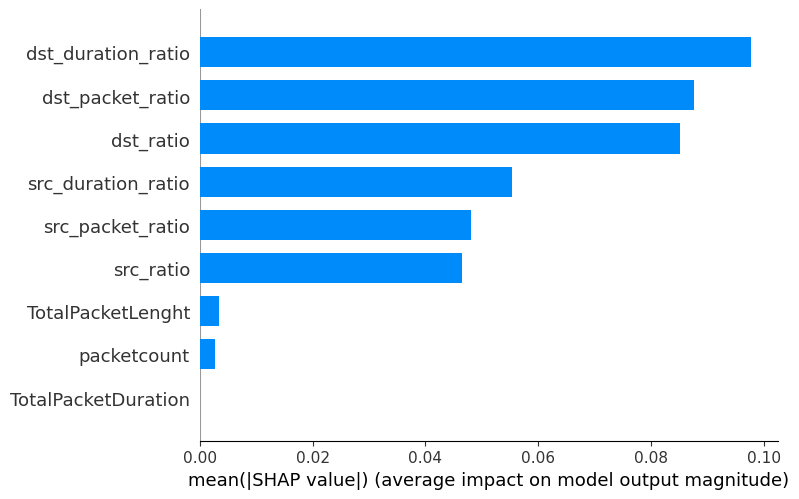

In [19]:
# Primera forma de visualizar los SHAP values kMeans
shap.summary_plot(kmeans_shap_values, X_test, plot_type='bar')

In [21]:
pd.DataFrame(kmeans_shap_values, columns=X_train.columns)['dst_duration_ratio'].abs().mean()

0.09762618293948906

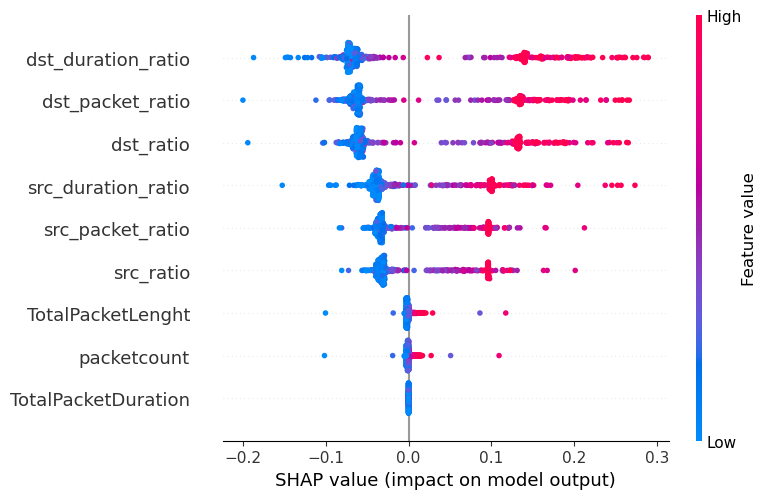

In [22]:
 #Segunda Forma de Calcular los SHAP values Kmeans
shap.summary_plot(kmeans_shap_values, X_test)

## LOF

In [23]:
# Crear un objeto explainer de SHAP para LOF
lof_explainer = shap.Explainer(lof.fit_predict, X_test)

In [24]:
# Calcular los SHAP values LOF
lof_shap_values = lof_explainer(X_test)

Exact explainer: 508it [35:32,  4.22s/it]                                                                                          


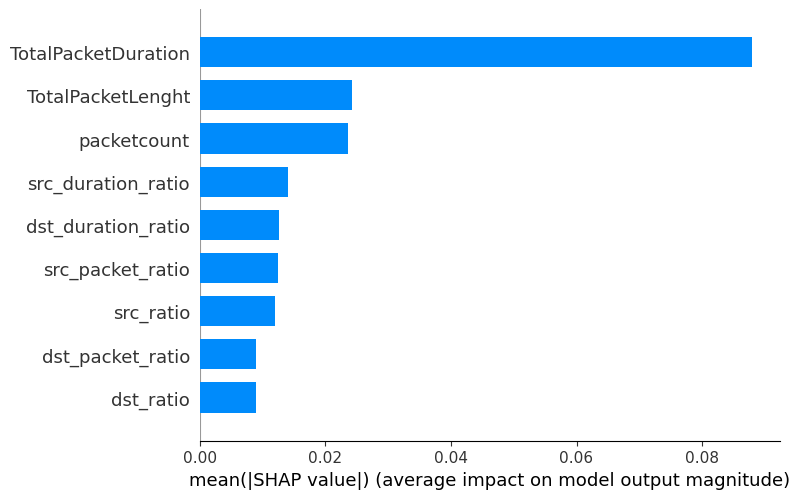

In [25]:
# Primera forma de visualizar los SHAP values LOF
shap.summary_plot(lof_shap_values, X_test, plot_type='bar')

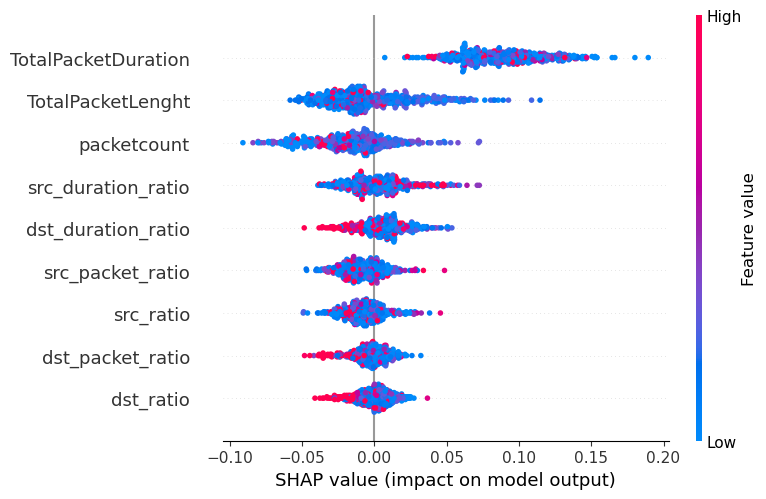

In [26]:
# Segunda Forma de Calcular los SHAP values LOF
shap.summary_plot(lof_shap_values, X_test)